In [2]:
from sklearn.datasets import fetch_openml

## Load the data 

In [3]:
import numpy as np
data = fetch_openml('mnist_784', version=1, as_frame=False)
images = np.asarray(data.data)

# Preproccesing the data

In [5]:


X_clean = images.astype(np.float32)

# Normalize pixels from [0,255] -> [0,1]
X_clean = X_clean / 255.0

X_clean.shape

(70000, 784)

## Add noise and train the model to reconstruct the clean image 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 1) Add noise
np.random.seed(42)
noise_std = 0.35   
X_noisy = X_clean + np.random.normal(0, noise_std, X_clean.shape).astype(np.float32)

# Clip to valid range [0,1]
X_noisy = np.clip(X_noisy, 0.0, 1.0)

# 2) Split (input = noisy, target = clean)
X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, X_clean, test_size=0.2, random_state=42
)

# 3) Model pipeline (scale + regression)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

# 4) Train
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None


## Evaluate the model performance 

In [7]:
from sklearn.metrics import mean_squared_error
# metrics with and without noise
y_clean_pred = pipeline.predict(X_clean)
mse_clean = mean_squared_error(X_clean, y_clean_pred)
print("MSE (clean):", mse_clean)
rmse_clean = np.sqrt(mse_clean)
print("RMSE (clean):", rmse_clean)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE :", mse)
print("RMSE:", rmse)

MSE (clean): 0.013639056123793125
RMSE (clean): 0.11678636959762524
MSE : 0.012517710216343403
RMSE: 0.11188257333625913


## Plot and predict the clean image

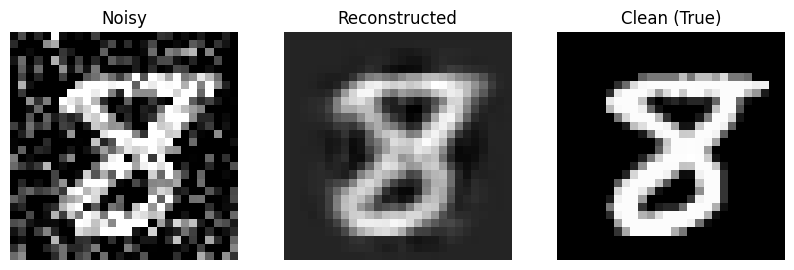

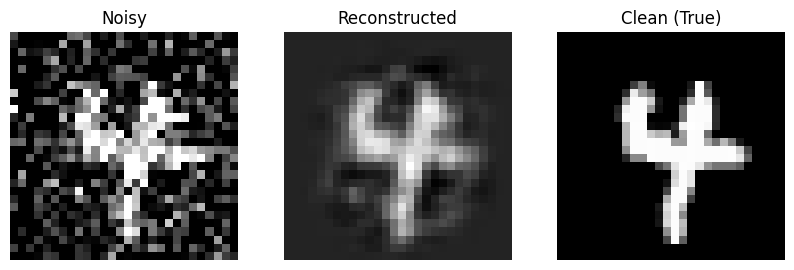

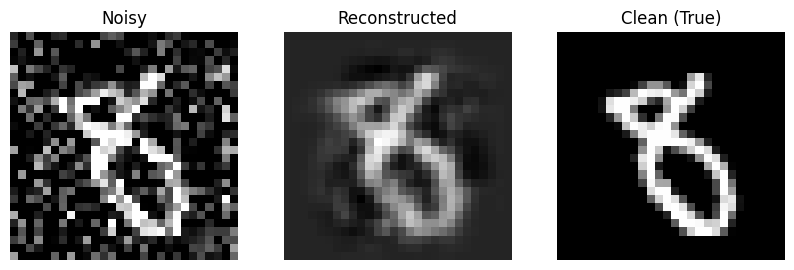

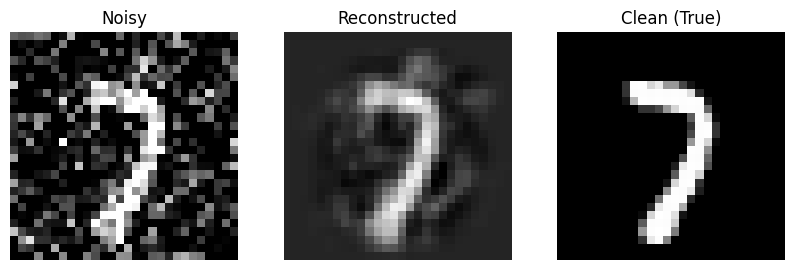

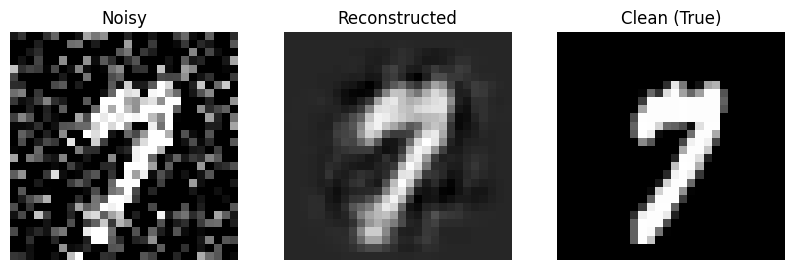

In [8]:
import matplotlib.pyplot as plt

def show_triplet(i):
    noisy_img = X_test[i].reshape(28, 28)
    recon_img = y_pred[i].reshape(28, 28)
    clean_img = y_test[i].reshape(28, 28)

    plt.figure(figsize=(10, 3))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_img, cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(recon_img, cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(clean_img, cmap="gray")
    plt.title("Clean (True)")
    plt.axis("off")

    plt.show()

# Show a few examples
for i in [0, 1, 2, 3, 4]:
    show_triplet(i)